# Notebook 03: Results presentation notebook

## Intro: 

Spotify is one of the most widely used music streaming services. Thus it a desirable source to draw data from. Fortunately, Spotify has a fairly user friendly web API, which can be used to access a wealth of information. 

More specifically, the API has an endpoint, which provides audio information about tracks. One of the more interesting pieces of audio information at this endpoint is a track's valence, an audio variable that measures a songs happiness (0 being completely devoid of happiness, 1 being completely happy). 

The goal of our investigation is to explore the presence of valence amoung our group's and some other student's playlists, as well as investigate what variables may explain a track's valence. With this motivation in mind, we form three driving questions: Who has the highest average valence in our sample? What are the playlists, and songs within these playlists with the highest valence?  And lastly, what other audio variables explain some of the variance in valence? For the final question, we hypothesize that playlists with higher danceability will have higher valence, and playlists that are more "wordy" will have lower valence. 

## Importing Data: 

In [97]:
#importing packages, and csv files. 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
playlist_df = pd.read_csv('Playlists.csv')
track_df = pd.read_csv('Tracks.csv')
audio_df = pd.read_csv('Audio.csv')

### Playlist Dataframe 
this frame contains the names, and ids for the playlists of our sampled spotify users. 

In [98]:
playlist_df.head()

,Unnamed: 0,name,playlist_id,user_id
0,0,Your Top Songs 2017,37i9dQZF1E9UBfOE5yO2Rg,eric
1,1,The Ones That Got Away,37i9dQZF1Eak9mtZUi93hp,eric
2,2,Passed,0CluAklouKBTc4lDdaumFh,eric
3,3,DJ,5xQcD38XyjsbveWoXufZ04,eric
4,4,House,2ueo7tfdlg5DF08XxLFLEQ,eric


### Tracks Dataframe 
this frame contains the names, and ids for the songs in our sampled spotify users' playlists. 

In [102]:
track_df.head()

,Unnamed: 0,playlist_id,song_name,track_id,user_id
0,0,0CluAklouKBTc4lDdaumFh,A Face In The Crowd,4tSZr210OTY6upjNYfEYUI,eric
1,1,0CluAklouKBTc4lDdaumFh,Run Of The Mill,3S574gsoQJl826YjsuRqSr,eric
2,2,0CluAklouKBTc4lDdaumFh,Out On The Weekend - Remastered Album Version,7DqktFsRwJa0XDFPMjV1xJ,eric
3,3,0CluAklouKBTc4lDdaumFh,Strangers,7obb4s6A7gf0Lc2AGxodMy,eric
4,4,0CluAklouKBTc4lDdaumFh,Stephanie Says - Original Mix,7brL0ZuueQZUgpDgheNcqs,eric


### Audio Dataframe 
this frame contains various audio data variables for the songs in our sampled spotify users' playlists. 

In [103]:
audio_df.head()

,Unnamed: 0,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,0,0.1100,https://api.spotify.com/v1/audio-analysis/4tSZ...,0.699,239307,0.610,4tSZr210OTY6upjNYfEYUI,0.001880,4,0.0600,-13.372,0,0.0272,105.568,4,https://api.spotify.com/v1/tracks/4tSZr210OTY6...,audio_features,spotify:track:4tSZr210OTY6upjNYfEYUI,0.755
1,1,0.0303,https://api.spotify.com/v1/audio-analysis/3S57...,0.542,171693,0.643,3S574gsoQJl826YjsuRqSr,0.007070,11,0.1050,-7.864,0,0.0296,136.674,4,https://api.spotify.com/v1/tracks/3S574gsoQJl8...,audio_features,spotify:track:3S574gsoQJl826YjsuRqSr,0.788
2,2,0.0967,https://api.spotify.com/v1/audio-analysis/7Dqk...,0.673,271933,0.265,7DqktFsRwJa0XDFPMjV1xJ,0.033600,9,0.0809,-15.711,1,0.0387,136.748,4,https://api.spotify.com/v1/tracks/7DqktFsRwJa0...,audio_features,spotify:track:7DqktFsRwJa0XDFPMjV1xJ,0.641
3,3,0.2530,https://api.spotify.com/v1/audio-analysis/7obb...,0.470,198373,0.397,7obb4s6A7gf0Lc2AGxodMy,0.000014,0,0.1090,-9.337,1,0.0345,128.690,4,https://api.spotify.com/v1/tracks/7obb4s6A7gf0...,audio_features,spotify:track:7obb4s6A7gf0Lc2AGxodMy,0.487
4,4,0.8510,https://api.spotify.com/v1/audio-analysis/7brL...,0.556,169560,0.284,7brL0ZuueQZUgpDgheNcqs,0.000024,0,0.0965,-14.921,1,0.0332,112.894,4,https://api.spotify.com/v1/tracks/7brL0ZuueQZU...,audio_features,spotify:track:7brL0ZuueQZUgpDgheNcqs,0.238


## General Exploration:

Using pandas we can concat the audio and tracks dataframes, so we can see the names of the tracks, and the user whose playlist the song is in for the audio data.  

In [104]:
tracks = pd.concat([track_df, audio_df], axis=1, join='inner')

In [105]:
tracks.head() 

,Unnamed: 0,playlist_id,song_name,track_id,user_id,Unnamed: 0,acousticness,analysis_url,danceability,duration_ms,...,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,0,0CluAklouKBTc4lDdaumFh,A Face In The Crowd,4tSZr210OTY6upjNYfEYUI,eric,0,0.1100,https://api.spotify.com/v1/audio-analysis/4tSZ...,0.699,239307,...,0.0600,-13.372,0,0.0272,105.568,4,https://api.spotify.com/v1/tracks/4tSZr210OTY6...,audio_features,spotify:track:4tSZr210OTY6upjNYfEYUI,0.755
1,1,0CluAklouKBTc4lDdaumFh,Run Of The Mill,3S574gsoQJl826YjsuRqSr,eric,1,0.0303,https://api.spotify.com/v1/audio-analysis/3S57...,0.542,171693,...,0.1050,-7.864,0,0.0296,136.674,4,https://api.spotify.com/v1/tracks/3S574gsoQJl8...,audio_features,spotify:track:3S574gsoQJl826YjsuRqSr,0.788
2,2,0CluAklouKBTc4lDdaumFh,Out On The Weekend - Remastered Album Version,7DqktFsRwJa0XDFPMjV1xJ,eric,2,0.0967,https://api.spotify.com/v1/audio-analysis/7Dqk...,0.673,271933,...,0.0809,-15.711,1,0.0387,136.748,4,https://api.spotify.com/v1/tracks/7DqktFsRwJa0...,audio_features,spotify:track:7DqktFsRwJa0XDFPMjV1xJ,0.641
3,3,0CluAklouKBTc4lDdaumFh,Strangers,7obb4s6A7gf0Lc2AGxodMy,eric,3,0.2530,https://api.spotify.com/v1/audio-analysis/7obb...,0.470,198373,...,0.1090,-9.337,1,0.0345,128.690,4,https://api.spotify.com/v1/tracks/7obb4s6A7gf0...,audio_features,spotify:track:7obb4s6A7gf0Lc2AGxodMy,0.487
4,4,0CluAklouKBTc4lDdaumFh,Stephanie Says - Original Mix,7brL0ZuueQZUgpDgheNcqs,eric,4,0.8510,https://api.spotify.com/v1/audio-analysis/7brL...,0.556,169560,...,0.0965,-14.921,1,0.0332,112.894,4,https://api.spotify.com/v1/tracks/7brL0ZuueQZU...,audio_features,spotify:track:7brL0ZuueQZUgpDgheNcqs,0.238


With the frames merged, we can take a look at the averages of several audio variables for the users in our sample. 

In [106]:
tracks[['user_id','danceability','speechiness','valence','acousticness','liveness','instrumentalness']]\
.groupby('user_id').mean() 

,danceability,speechiness,valence,acousticness,liveness,instrumentalness
user_id,,,,,,
ben,0.647743,0.141853,0.404665,0.124873,0.198092,0.099672
eric,0.547913,0.059988,0.507305,0.285941,0.193818,0.120558
gezim,0.581875,0.104463,0.459970,0.253121,0.187781,0.190666
luke,0.626285,0.135590,0.485235,0.165536,0.224188,0.036665
miranda,0.608070,0.122413,0.440569,0.203326,0.203441,0.048208


Since we will be looking at valence, It'll also be informative to look at the distribution of valence for a few of the users in our sample.

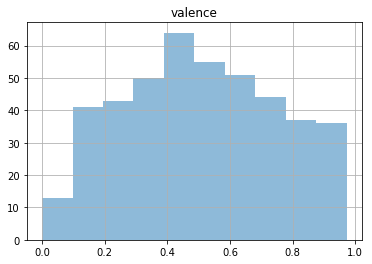

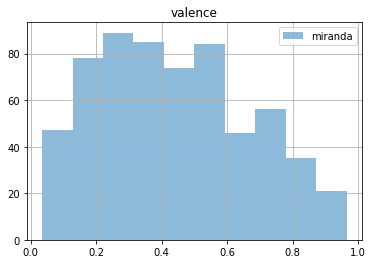

In [101]:
sub_track = tracks [['user_id','valence']].set_index('user_id')
sub_track.loc['eric',:].hist(alpha=0.5, label='eric')
sub_track.loc['miranda',:].hist(alpha=0.5, label='miranda')
plt.legend(loc='upper right')
plt.show()

It looks like songs in my own playlists might be more skewed towards being more valent, than my partners. 

## Main Analysis 

### Question 1: Who has the highest average valence in our sample?

![bar](Bar Graph.JPG)

The bar graph above provides an answer to our first question showing that I have the highest average valence among my playlists with Luke trailing close behind. Overall, it is interesting to note that the average for valence for all the sampled users is fairly close sitting at around 50%, perhaps a somewhat dualistic message about life. 

### Question 2: What are the playlists, and songs within these playlists with the highest valence?

![maps](Map.JPG)

The graph above answers the first part of Question 2 showing that the playlists with the highest valence are Geoff, get groovin, one of these crazy old nights, WDUB Mentorship, island livin, and JingleBells. Out of these six most valent playlist three belong to Miranda, showing that while she doesn't have the highest average valence she has produced some of the most valent playlists in our sample. Some of these playlists even have names that would suggest higher valence such as "island livin", or "get groovin". Another interesting observation is that one of these playlists Geoff is shared by both myself, and Luke. 

In [109]:
tracks[['song_name','valence','user_id']].sort_values(by='valence',ascending=False).set_index('user_id').head(5)

,song_name,valence
user_id,,
luke,Last Christmas,0.981
gezim,Two Weeks,0.976
eric,Peg,0.972
eric,Moonage Daydream - 2012 Remastered Version,0.966
eric,A Dream of You and Me,0.966


The table above answer the second part of Question 2 by showing the top 5 most valent songs in our sample. At number one, sits Last Christmas a familiar Christmas tune with a near perfect valence score. 

### Question 3: What other audio variables explain some of the variance in valence?

![relation](Relation 1.JPG)

Based on the figure above, it seems that we have some evidence for our hypothesis that playlists with higher danceability will have higher valence, which seems to mesh well with common sense. An interesting feature of this figure is that a playlist named Study Music has the lowest valence, and danceability, which only seems fitting for a study playlist. On the other hand, playlists with some of the highest valence, and danceability have names like get groovin, and island livin (which we saw in the previous figure). This just might explain why we aren't hearing many Radio Head songs at parties. 

![relation](Relation 2 .JPG)

Based on the figure above, it seems that we have don't have much evidence for our hypothesis that playlists that are more "wordy" will have lower valence, which we find to be perhaps a somewhat optimistic finding about word usage in music. Once again, Study Music sits low on both axes, demonstrating the neutral features of good Study playlist. While a playlist going by the name "the wu is eternal" sits relatively high on the "speechiness" scale, which makes sense considering the Wu-tang clan is known for the lyrical ingenuity. 

## Conclusion: 
Overall, we have shown that the spotify provides a wealth of information on listening behaviors such as being able to generalize the "valence", or happiness of the playlists you listen to, and how other audio features come together to define a playlist, whether it be for studying, or partying (two aspects of many college students lives). 